# ** AI & Cognition Project**
# Phase I - Part 1
 
 5 DS 1 - 
 Group 1:

*   Med Anas FATTOUM
*   Iskander REGAIEG
*   Youssef Aziz ZGHAL
*   Haroun ELLEUCH
*   Saida MAJBOUR
*   Nadhir BOUHAOUALA


# Setting up the environment

In [ ]:
#!pip install PyPDF2
#!pip install visualise_spacy_tree
#!pip install Unidecode
#!pip install textacy
#!pip install spacy

In [ ]:
#Libraries imports

#Personal tools used throughout this notebook
from utils import *

import matplotlib.pyplot as plt
import glob
import re #regex
import numpy as np
import pandas as pd
#import PyPDF2
import html
import unidecode

from IPython.display import Image, display

import spacy
from spacy.matcher import Matcher 
import visualise_spacy_tree
from spacy import displacy 

import nltk
from nltk.corpus import wordnet
from nltk.metrics import *
#from nltk.corpus import stopwords

from collections import Counter
import seaborn as sns; sns.set_theme()
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#!python -m spacy download en_core_web_md

In [ ]:
#nltk.download('wordnet')
#nltk.download('verbnet')
#nltk.download('stopwords')

# Loading the corpora

In [ ]:
# load english language model for SpaCy
# en_core_web_sm: English multi-task CNN trained on OntoNotes. Size – 11 MB
nlp = spacy.load('en_core_web_md',disable=['ner','textcat'])

In [ ]:
cp_pmi = import_corpus('./Corpora/pmi.pdf',0,128)
cp_pmbok_1 = import_corpus('./Corpora/pmbok.pdf',4,10)
cp_pmbok_2 = import_corpus('./Corpora/pmbok.pdf',10,19)
cp_pmbok_3 = import_corpus('./Corpora/pmbok.pdf',19,24) +' '+ open('./Corpora/pmbok-3.2.txt', mode='r').read()
cp_pmbok_4 = open('./Corpora/pmbok-4.1.txt', mode='r').read() +' '+ import_corpus('./Corpora/pmbok.pdf',25,33)
cp_pmbok_5 = import_corpus('./Corpora/pmbok.pdf',33,40)
cp_pmbok_6= import_corpus('./Corpora/pmbok.pdf',40,46)

# Preprocessing : Cleaning

In [ ]:
#cleaning the base text (corpus)
print('Before cleaning:' , len(cp_pmi))
cp_pmi = clean(cp_pmi)
print('After cleaning:' ,len(cp_pmi))

Before cleaning: 238977
After cleaning: 210559


We can notice a size reduction in the corpus after the cleaning. (See the attached utils.py file for more information about the preprocessing)

In [ ]:
cp_pmbok_1 = clean(cp_pmbok_1)
cp_pmbok_2 = clean(cp_pmbok_2)
cp_pmbok_3 = clean(cp_pmbok_3)
cp_pmbok_4 = clean(cp_pmbok_4)
cp_pmbok_5 = clean(cp_pmbok_5)
cp_pmbok_6 = clean(cp_pmbok_6)

### Manual cleaning

In [ ]:
cp_pmbok_1 = remove_errors(detect_errors(cp_pmbok_1),cp_pmbok_1)
cp_pmbok_2 = remove_errors(detect_errors(cp_pmbok_2),cp_pmbok_2)
cp_pmbok_3 = remove_errors(detect_errors(cp_pmbok_3),cp_pmbok_3)
cp_pmbok_4 = remove_errors(detect_errors(cp_pmbok_4),cp_pmbok_4)
cp_pmbok_5 = remove_errors(detect_errors(cp_pmbok_5),cp_pmbok_5)
cp_pmbok_6 = remove_errors(detect_errors(cp_pmbok_6),cp_pmbok_6)

In [ ]:
# Transform the base text (corpus) into a spacy.tokens.doc.Doc
dc_pmi = nlp(cp_pmi)

dc_pmbok_1 = nlp(cp_pmbok_1)
dc_pmbok_2 = nlp(cp_pmbok_2)
dc_pmbok_3 = nlp(cp_pmbok_3)
dc_pmbok_4 = nlp(cp_pmbok_4)
dc_pmbok_5 = nlp(cp_pmbok_5)
dc_pmbok_6 = nlp(cp_pmbok_6)

In [ ]:
# For ease of usage, store all the docs in a list
docs = [dc_pmi, dc_pmbok_1, dc_pmbok_2, dc_pmbok_3, dc_pmbok_4, dc_pmbok_5, dc_pmbok_6]

## Chunking

In [ ]:
#Keep only nouns and verbs in the 7 corpora
docs_viz = [get_resume_complet_sans_synonymes(docs[1],adjectives=False,sub="Text") for doc in docs]
docs_viz = [doc_viz.loc[doc_viz.POS.isin(['NOUN', 'VERB'])] for doc_viz in docs_viz]

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [utils.py:156]
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [utils.py:156]
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [utils.py:156]
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [utils.py:156]
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

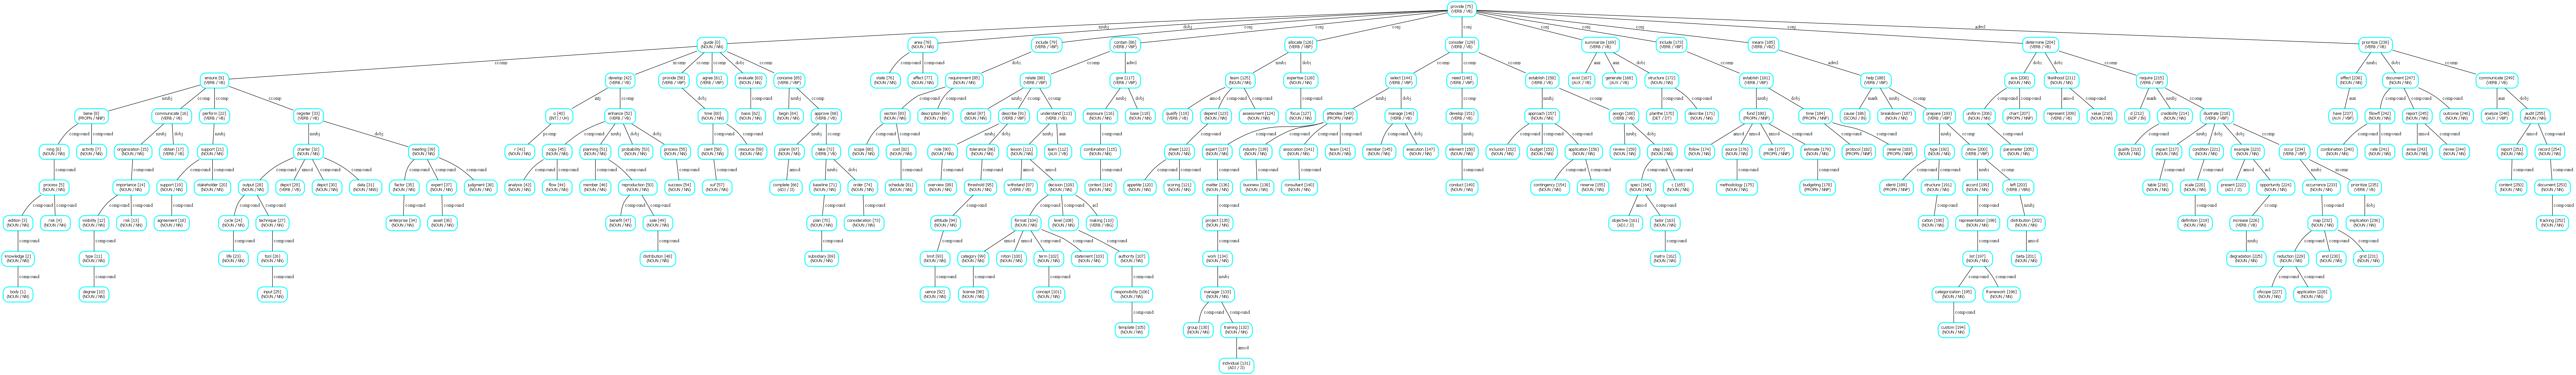

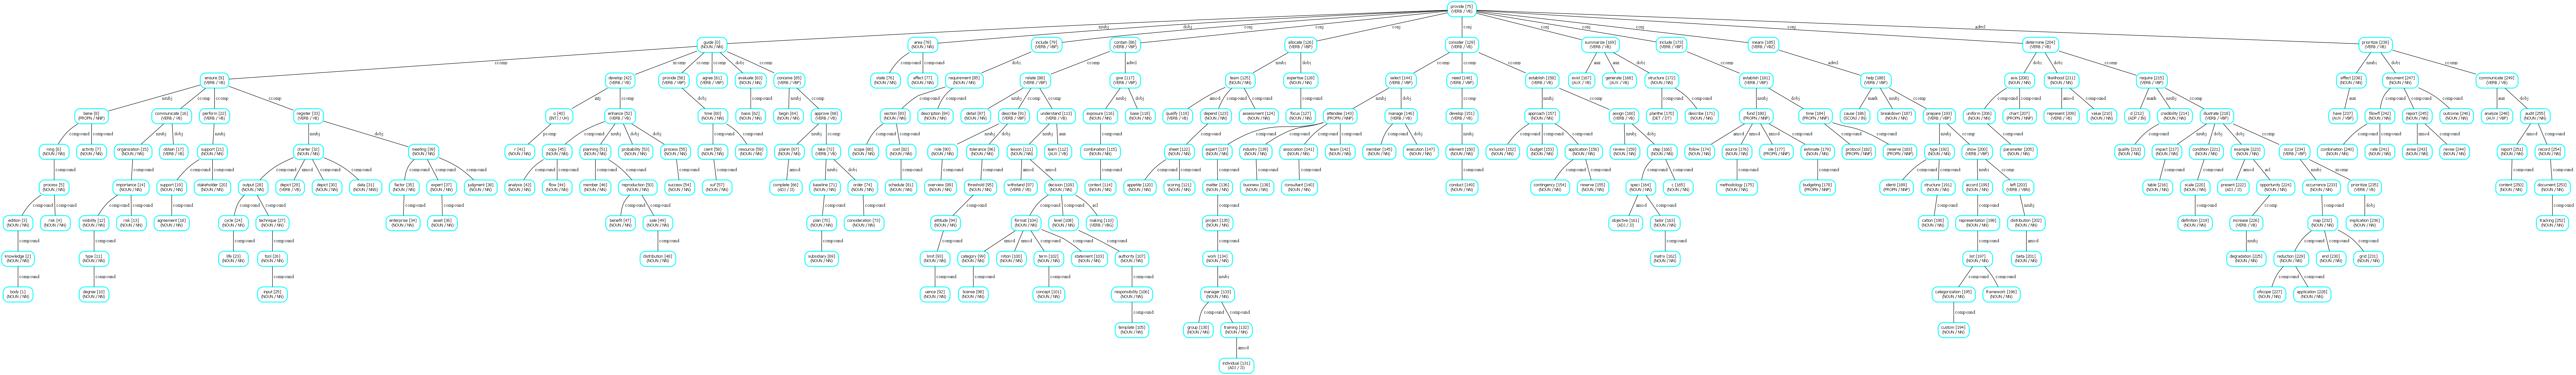

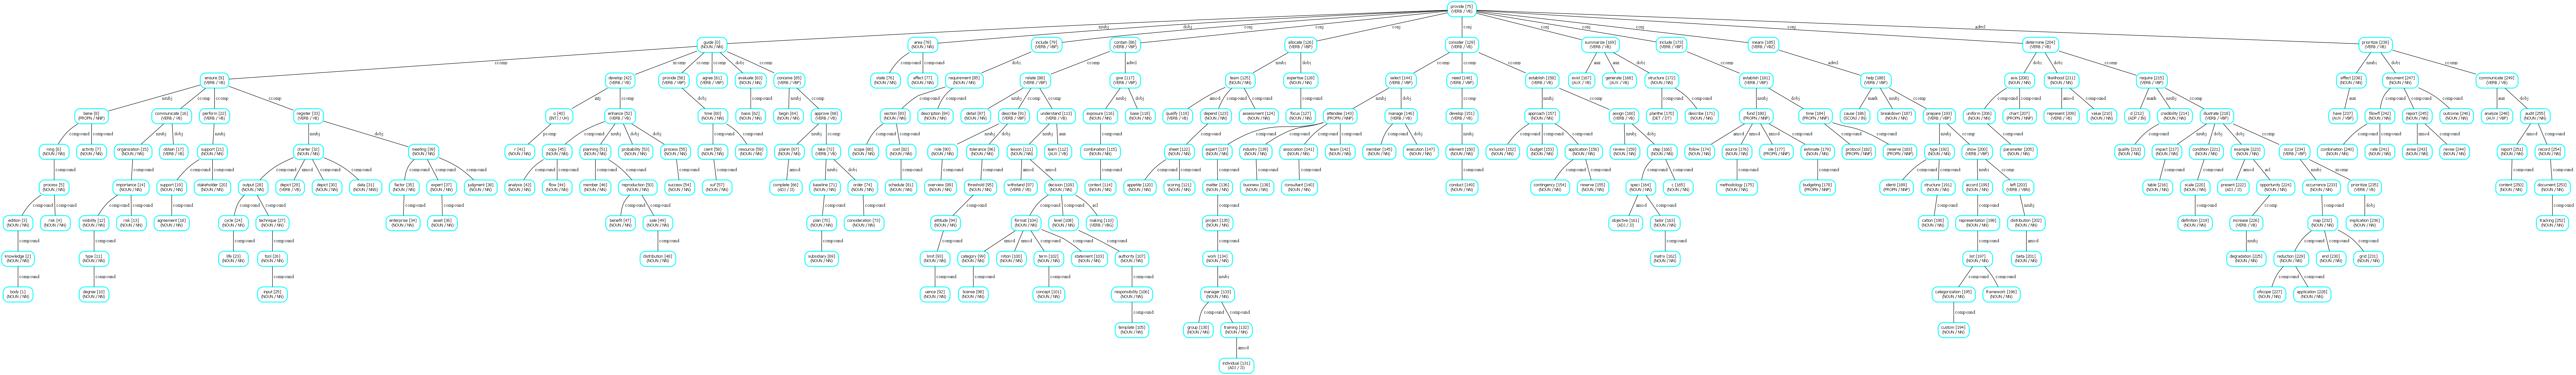

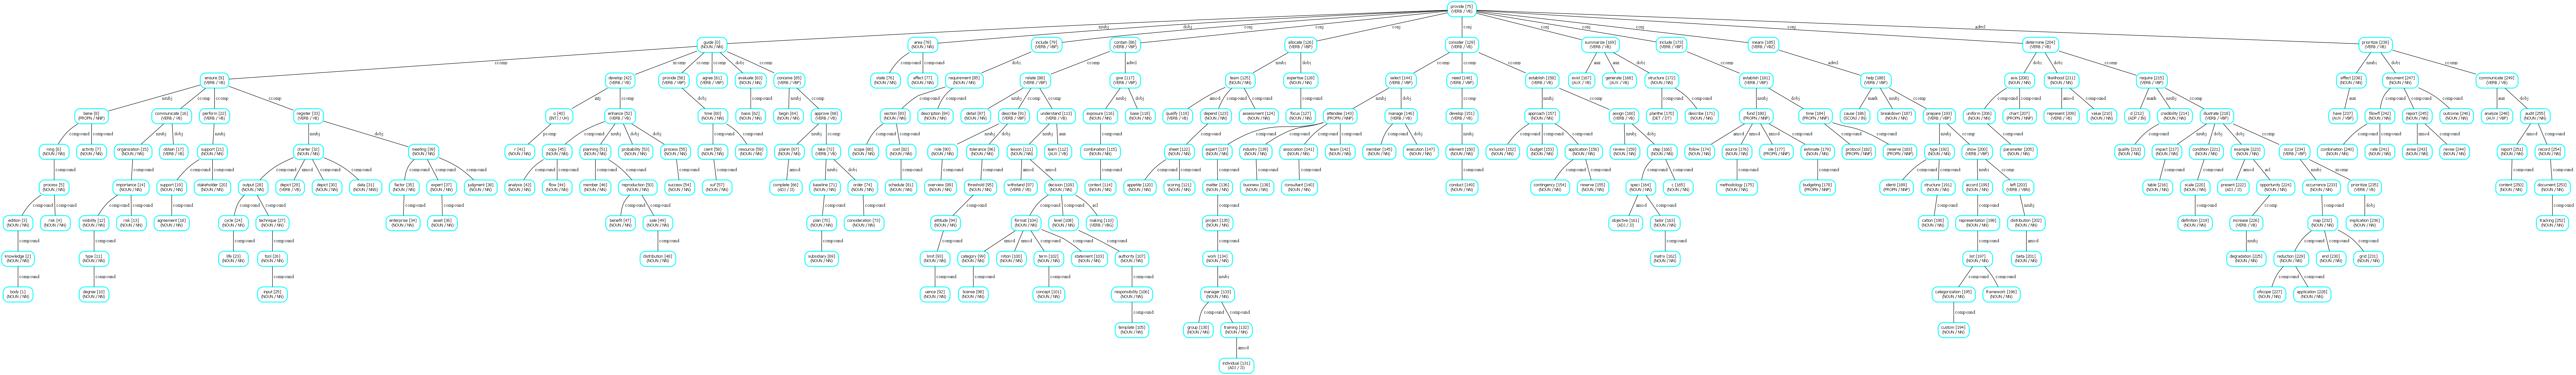

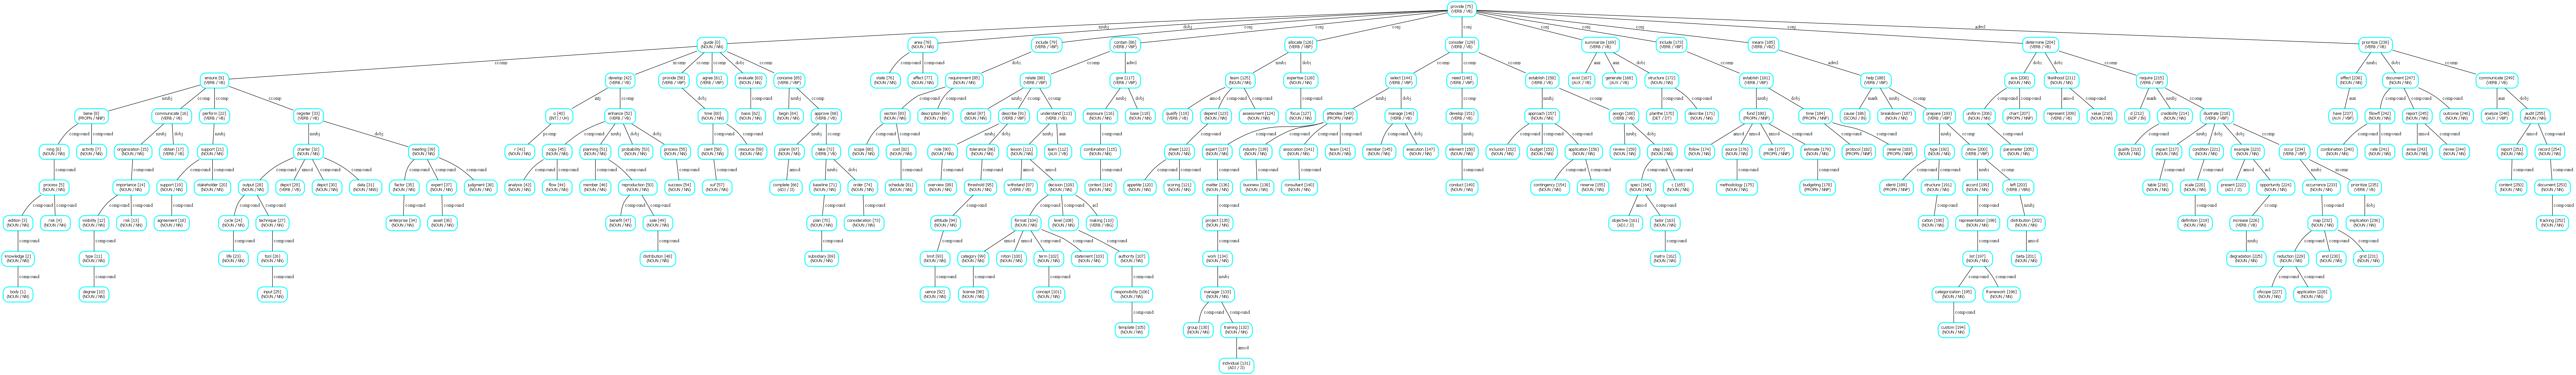

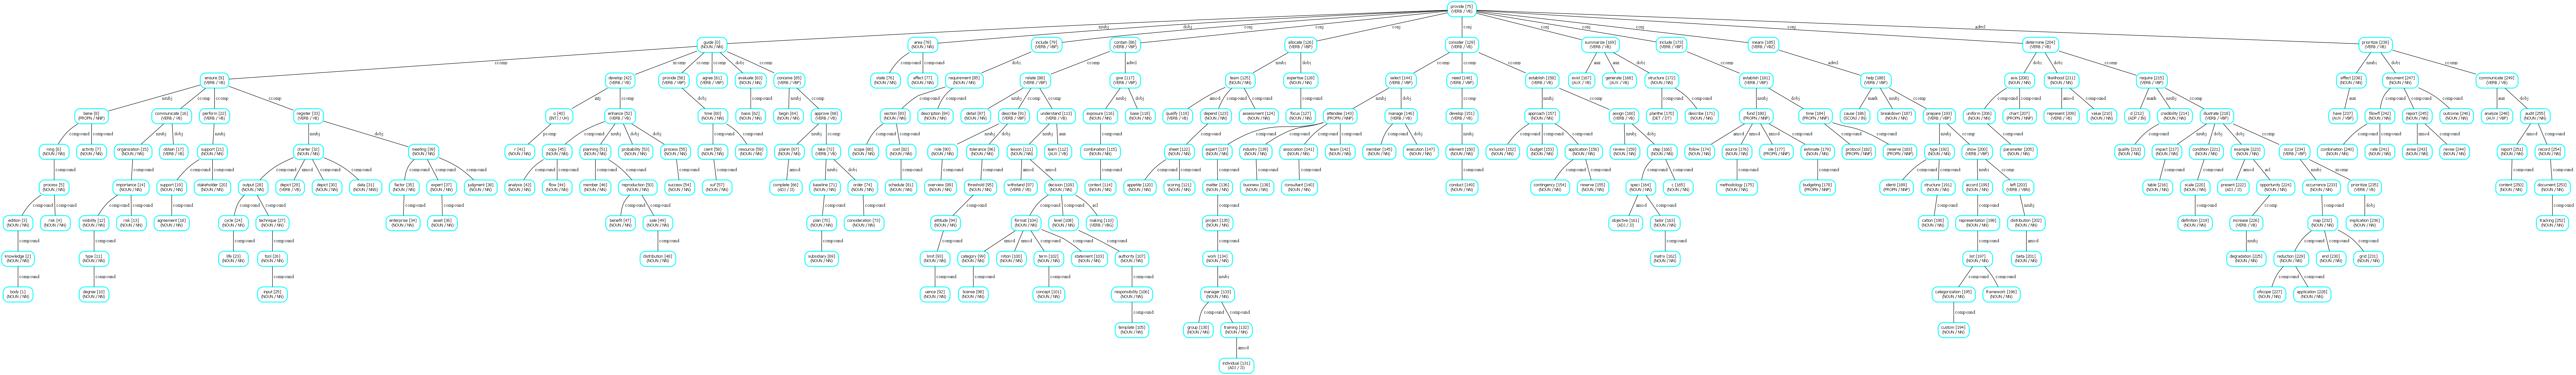

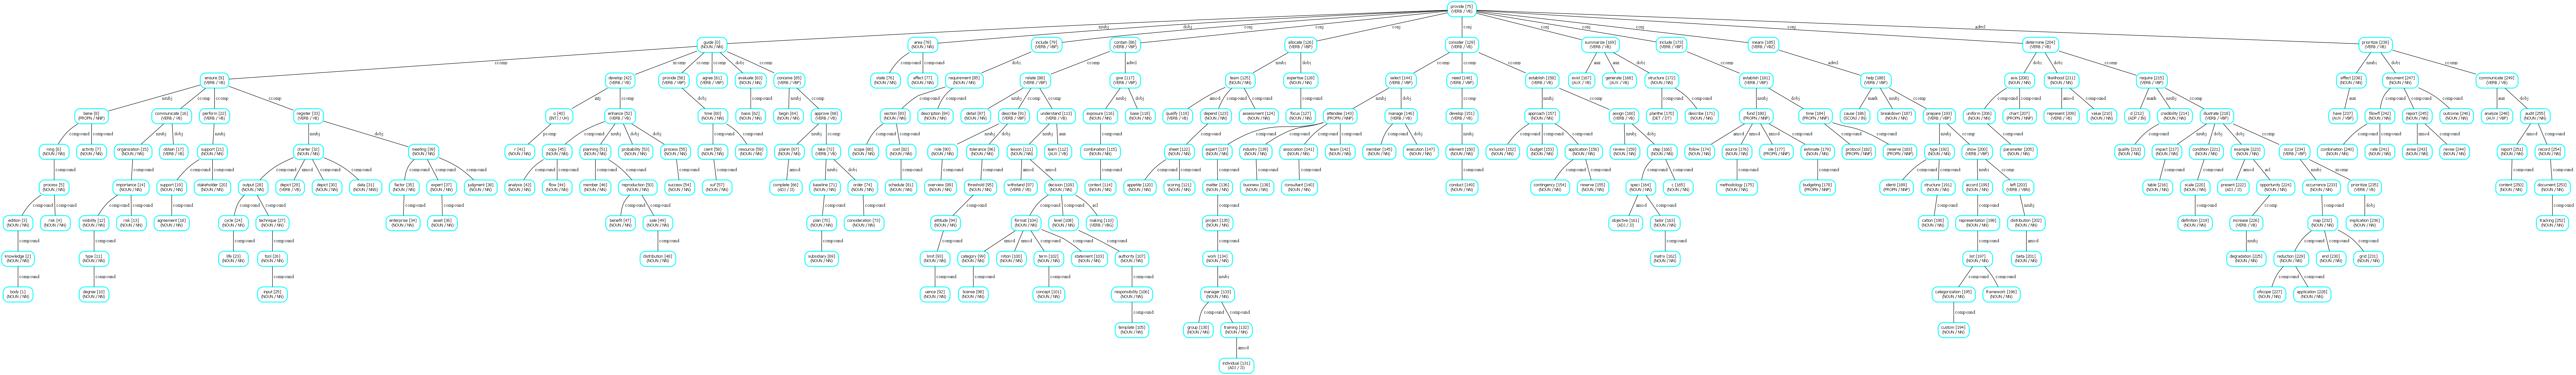

In [ ]:
for doc_viz in docs_viz:
    doc_image=nlp(" ".join(list(doc_viz['Lemma'])))
    png_doc=visualise_spacy_tree.create_png(doc_image)
    display(Image(png_doc))


## Frequencies

In [ ]:
corpora = [cp_pmi, cp_pmbok_1, cp_pmbok_2, cp_pmbok_3, cp_pmbok_4, cp_pmbok_5, cp_pmbok_6]

#### Plotting the occurences

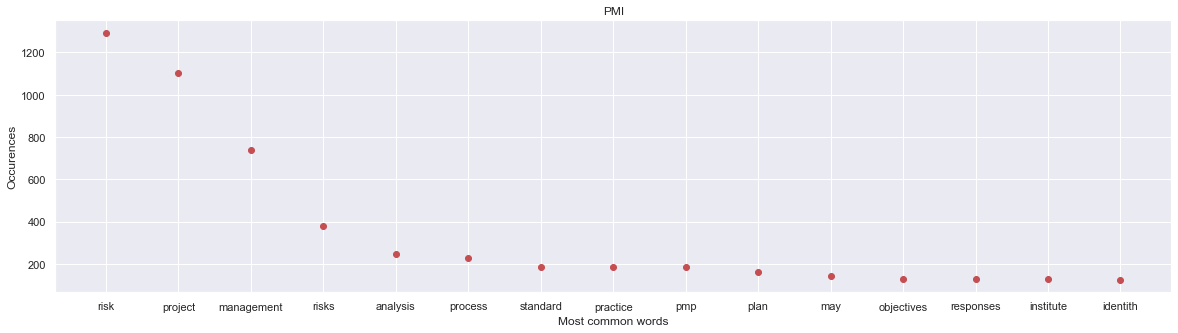

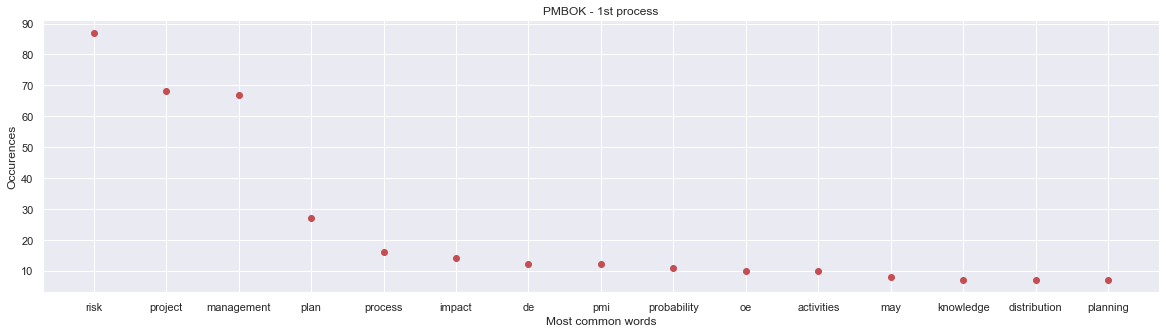

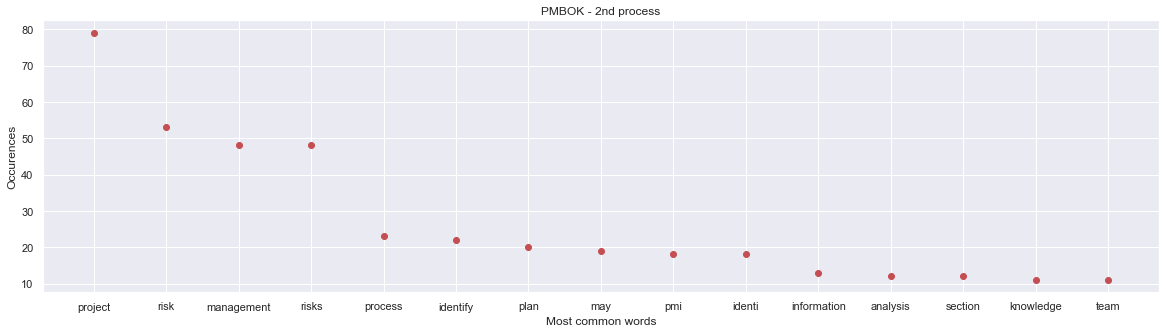

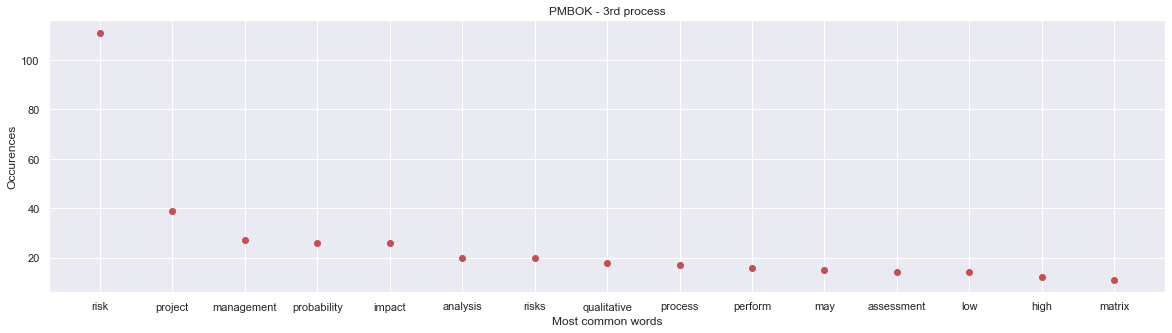

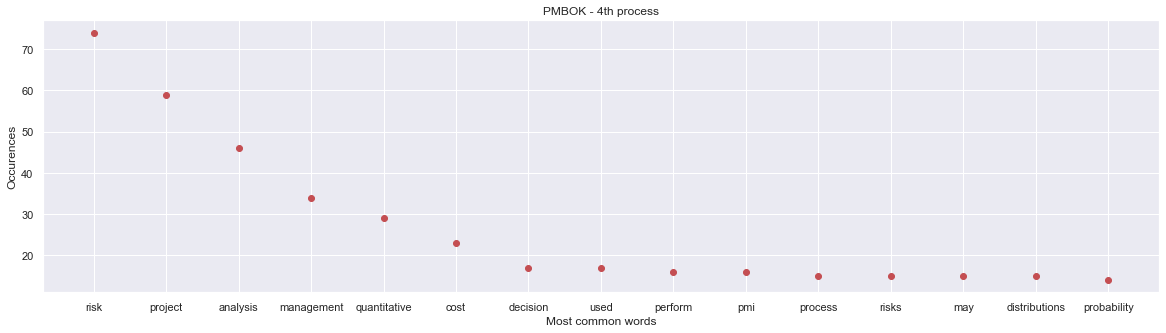

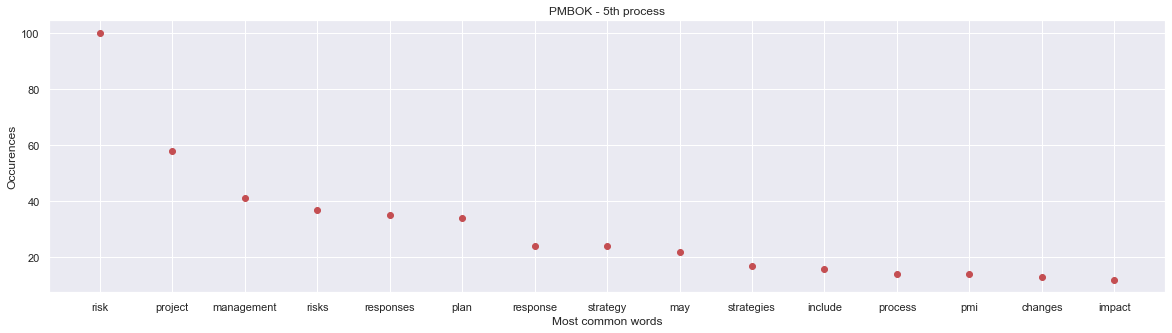

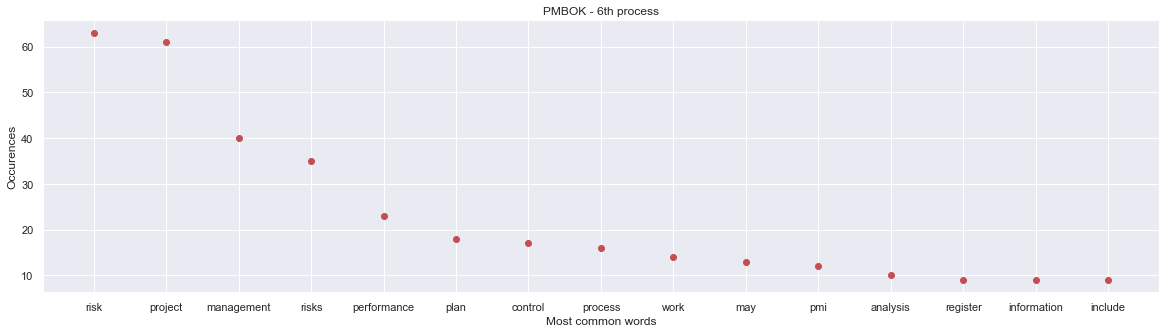

In [ ]:
titles = ['PMI', 'PMBOK - 1st process', 'PMBOK - 2nd process','PMBOK - 3rd process', 'PMBOK - 4th process', 'PMBOK - 5th process', 'PMBOK - 6th process'] 
i = 0
for corpus in corpora:
    mc = (get_most_common_words_with_occurences(corpus, 15))
    x_val = [x[0] for x in mc]
    y_val = [x[1] for x in mc]

    plt.rcParams['figure.figsize'] = [20, 5]

    plt.xlabel('Most common words')
    plt.ylabel('Occurences')
    plt.title(titles[i])
    plt.plot(x_val,y_val,'or')
    plt.show()
    i += 1

#### Plotting the frequencies

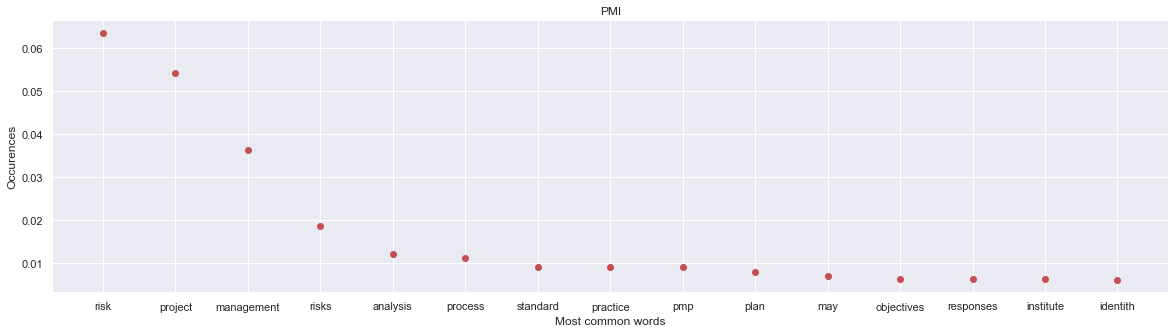

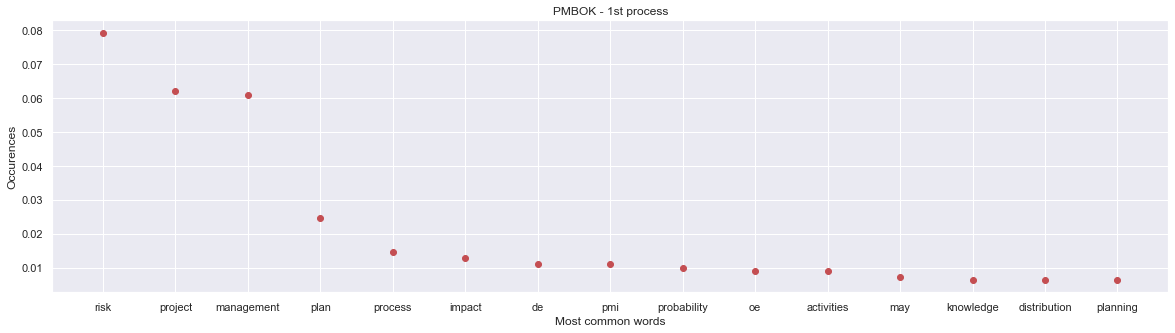

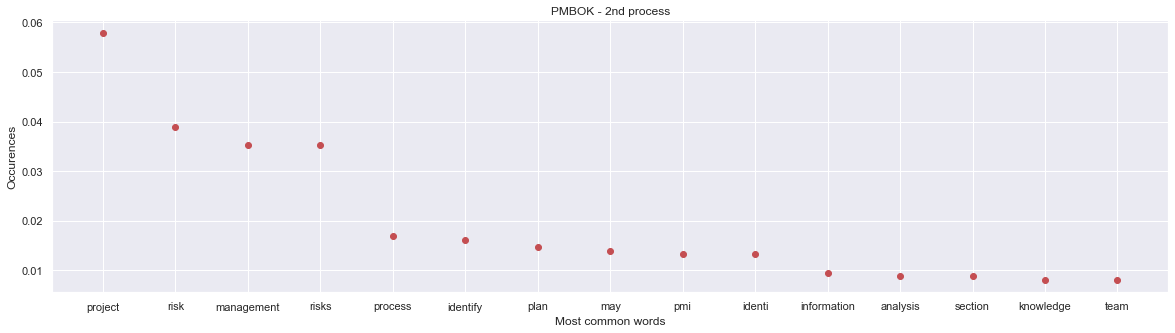

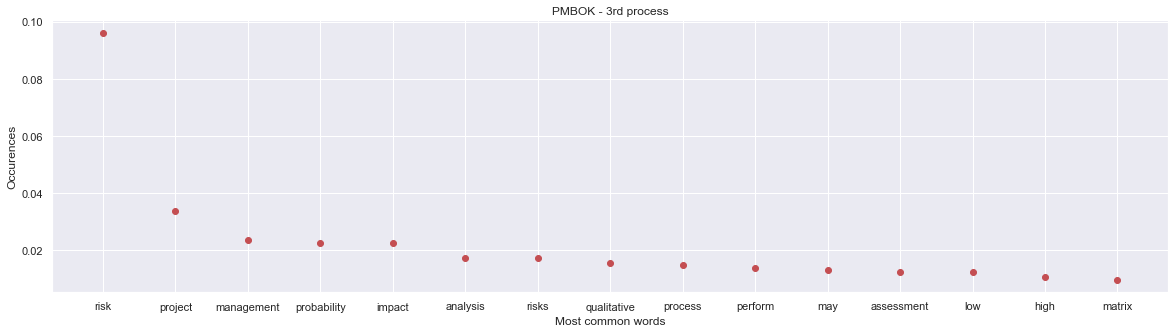

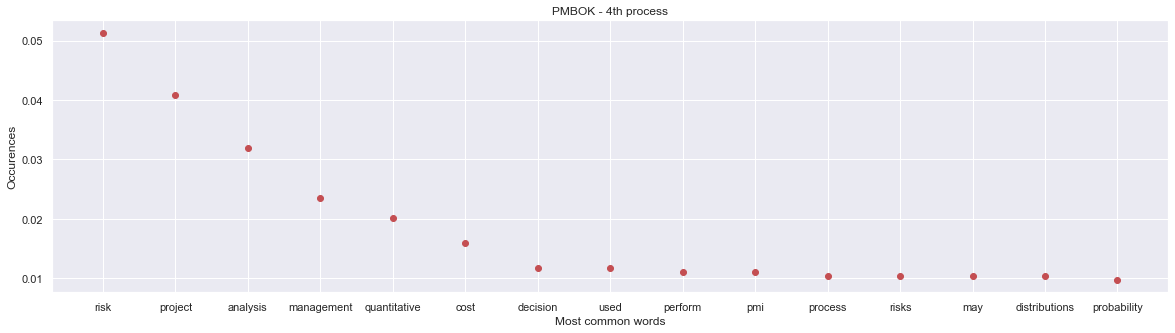

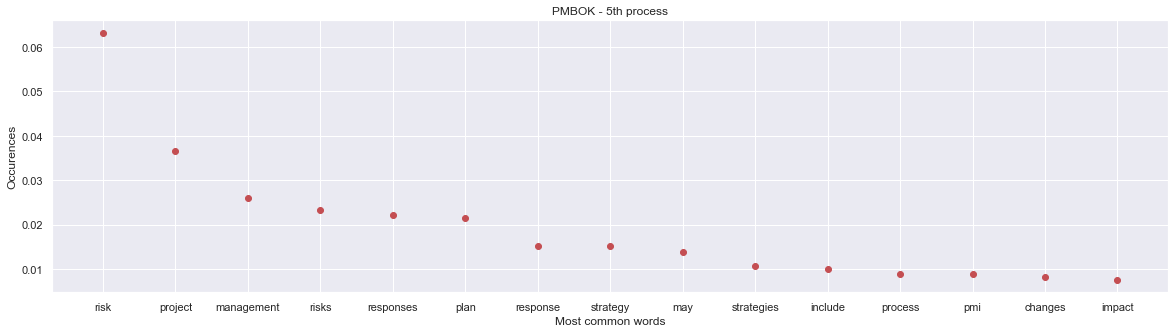

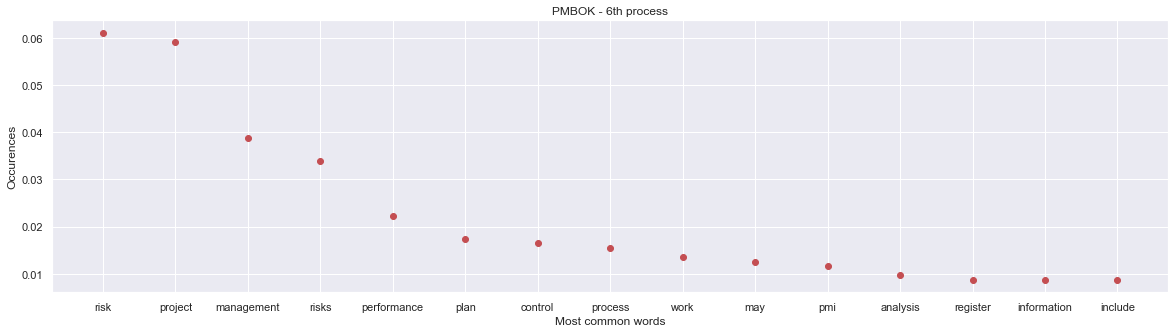

In [ ]:
titles = ['PMI', 'PMBOK - 1st process', 'PMBOK - 2nd process','PMBOK - 3rd process', 'PMBOK - 4th process', 'PMBOK - 5th process', 'PMBOK - 6th process'] 
i = 0
for corpus in corpora:
    mc = (get_most_common_words_with_frequencies(corpus, 15))
    x_val = [x[0] for x in mc]
    y_val = [x[1] for x in mc]

    plt.rcParams['figure.figsize'] = [20, 5]

    plt.xlabel('Most common words')
    plt.ylabel('Occurences')
    plt.title(titles[i])
    plt.plot(x_val,y_val,'or')
    plt.show()
    i += 1

It is clear, after visualising the top 15 words by number of occurences and by frequencies that the central theme of the corpus is risk management. This is well expected since the corpus is an extract of the PMBOK. "Risk", Project", "Management" and "Risks" alone contribute to %16.6 of the corpus.

The exact same can be said for the second corpus (PMI) which boasts the exact same four most common words albeit in far greater occurences, which is trivially explained by the diffenrence in size.

**Regarding TF - IDF:**
While we were able to compute, plot and draw conclusions based on the TF (Term Frequency), we cannot compute the IDF if we only have one document in our corpus. The Inverse Document Frequencey is defined as the number of documents containing occurencies of a word *w* divided by the total number of documents constituting the corpus.

In this particular case, the IDF is trivial and not especially pertinent seeing as the vast majority of the most common (and thus, the most interesting) words are used in the same proportions in both corpora.



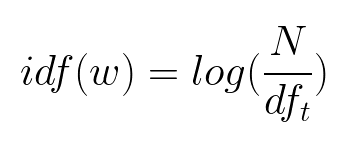


N : count of corpus (2 in this case)
df(t) = occurrence of t in N documents


TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

In [ ]:
#TF-IDF for PMBOKv5 only
tf_idf_pmbok = compute_tf_idf(corpora[1:])

In [ ]:
#TF-IDF for PMBOKv5 and PMI
tf_idf_all = compute_tf_idf(corpora)

In [ ]:
tf_idf_all[['project','risk','process','pmi','the']]

project      risk   process       pmi       the
0  0.306354  0.358475  0.063489  0.013585  0.522326
1  0.317806  0.406605  0.074778  0.056083  0.458015
2  0.317049  0.212704  0.092305  0.072239  0.521726
3  0.166574  0.474095  0.072609  0.042711  0.521078
4  0.227813  0.285731  0.057918  0.061780  0.571462
5  0.192823  0.332454  0.046544  0.046544  0.528602
6  0.319821  0.330307  0.083888  0.062916  0.508568

Interpretation:


By visualising the TF-IDF scores of some words, two observations are immediate.

**First**: The most used words accros all corpora also have the same, if not very close, scores.

**Second**: The more a word is relevent (i.e. repeated), the higher its score.

**Note**: The word 'the', although a stopword, still remains in the corpora since the ommission of stopwords is done in the tokenized texts.

## Levenshtein Distance

The levenshtein distance can be interpreted as the number of transformations required ( changin, adding or removing characters) to get from a word A to a word B. For example, to get from 'risk' to 'risks', on transformation is required : the addition of the character 's'. Thus lev(A,B) = 1.

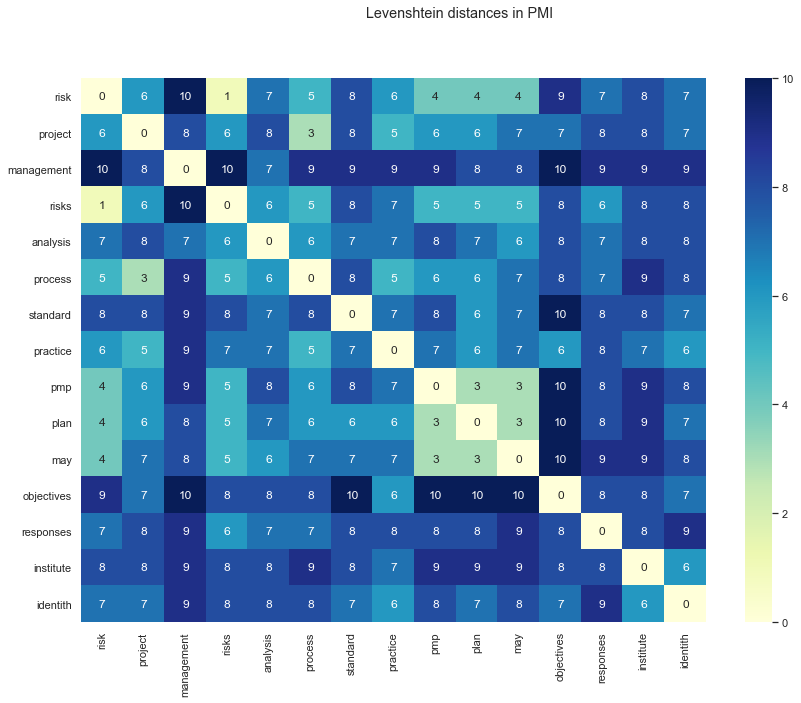

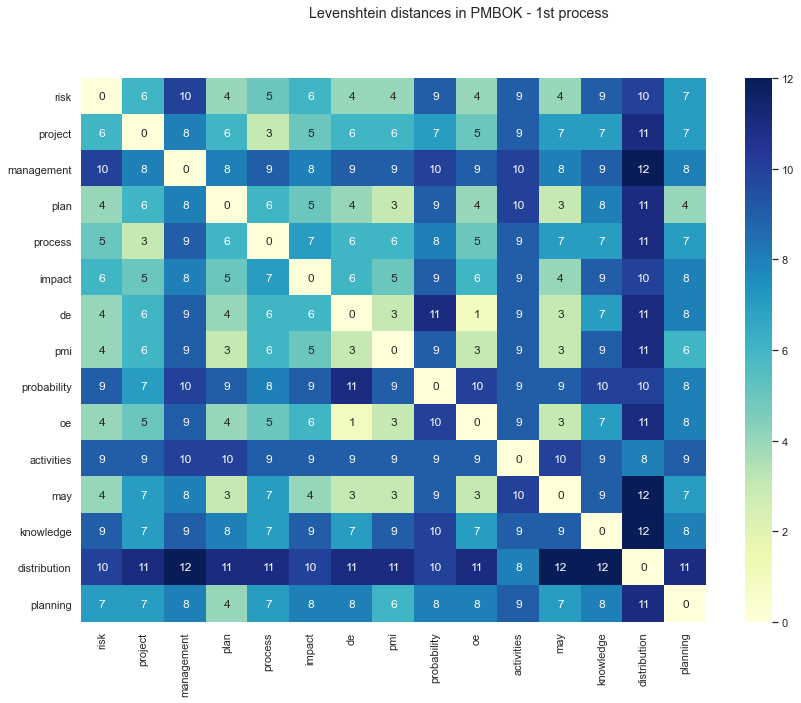

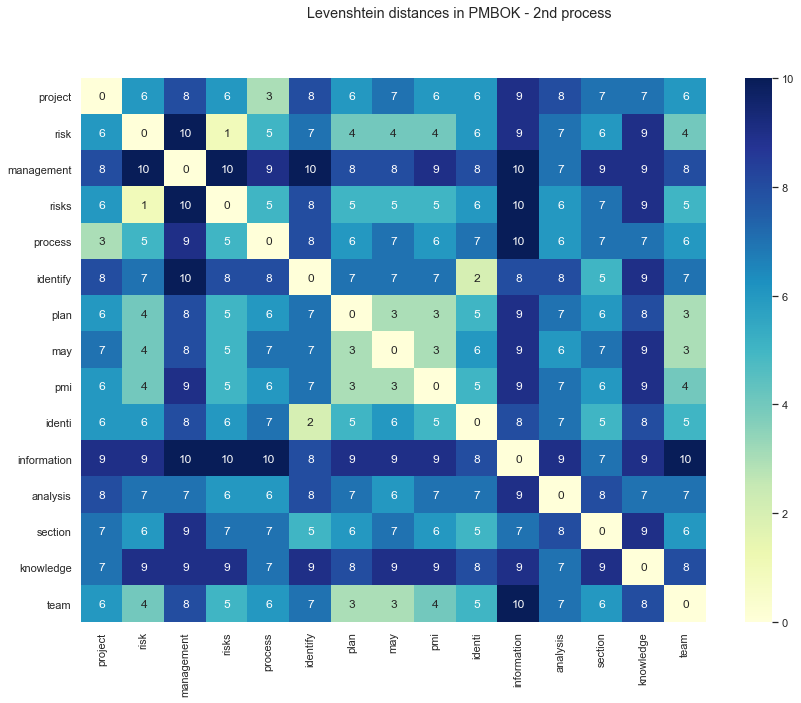

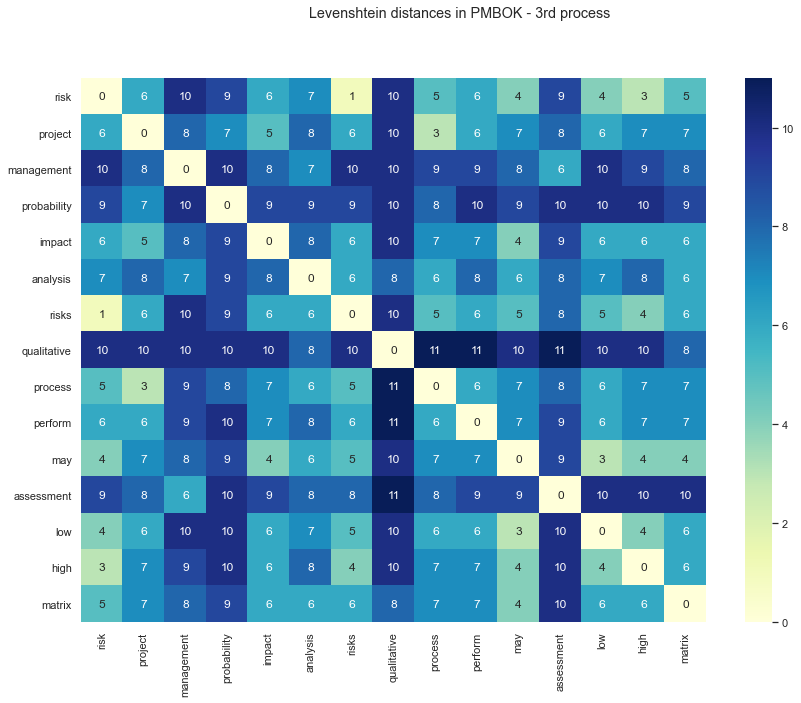

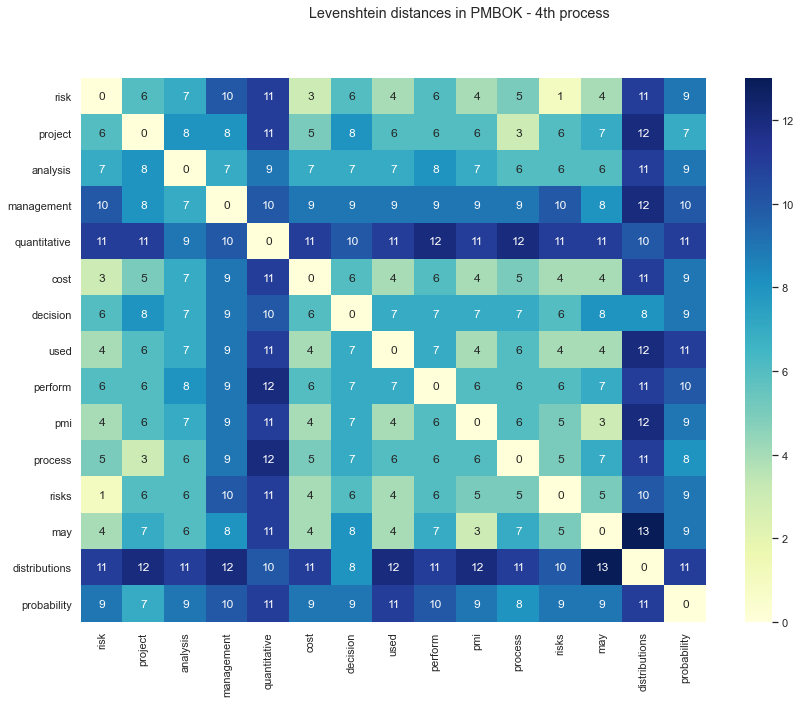

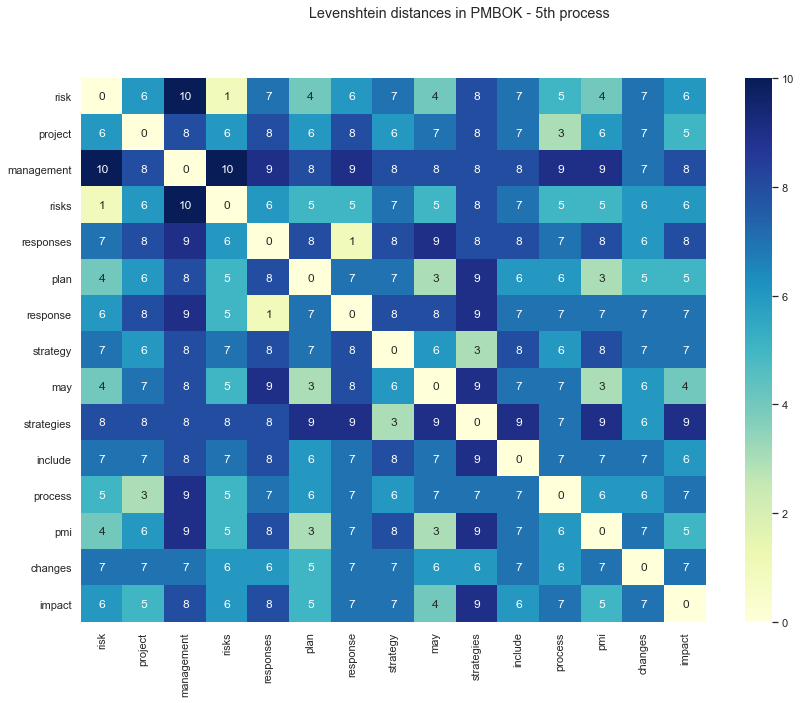

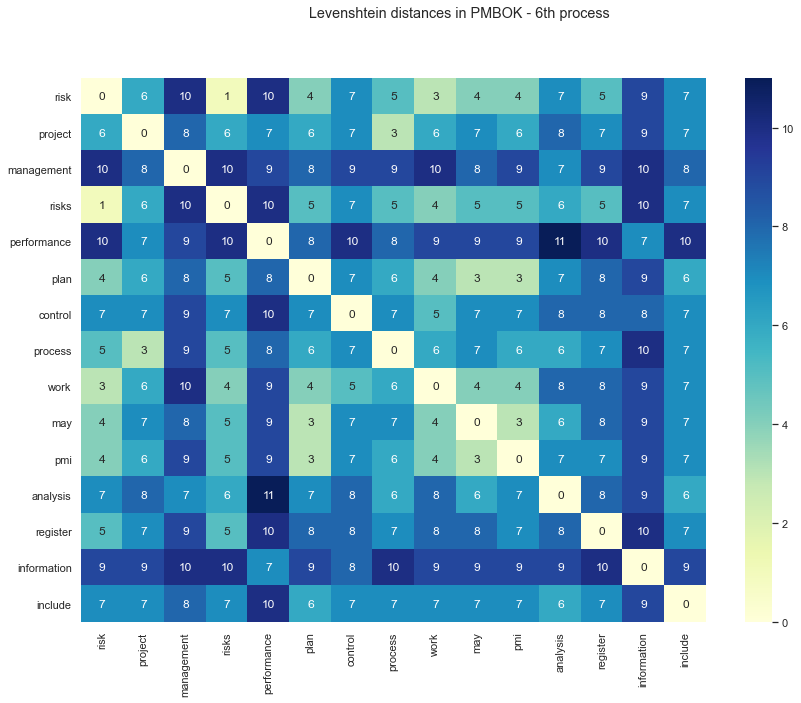

In [ ]:
#Levenshtein distances for the corpora
i=0
for corpus in corpora:
    
    fig, axes = plt.subplots(1, 1, figsize=(14, 10))
    fig.suptitle('Levenshtein distances in '+titles[i])
    i += 1
    mc_words = [ x[0] for x in get_most_common_words_with_occurences(corpus, 15)]
    matrix = get_levenshtein_matrix(mc_words)
    ax = sns.heatmap(matrix,cmap="YlGnBu", annot=True)

Interpretation:

Seeing the two Levenshtein Matrices, it is clear that some of the key words are very close to each other (risk and risks, for example). However to draw a final conlusion, a semantical analysis is necessary. This is where phase two of the project come in, to make sence of the words extracted from our baste material (pmi and pmbok 5th).

# Final output

The goal of this first step (Phase One of the project) is to obtain a clean dataframe containing only verbs and nouns for both corpa.

In [ ]:
i = 0
for doc in docs:
    final_output = get_nouns_verbs(doc,sub="Text")
    title = ".\\Output\\" + titles[i] + " output"
    final_output.to_csv(title)
    i += 1